In [6]:
from image_processor import find_pv_module, fix_barrel_distortion, random_image, split_module_to_cells
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import string

In [7]:
def generate_random_string(n):
    """Generate a random string of length n."""
    return ''.join(random.choices(string.ascii_letters + string.digits, k=n))

0


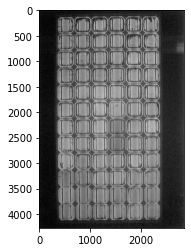

1/1 [==============================] - 0s 356ms/step


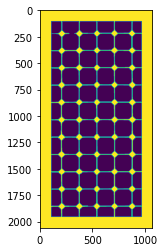

(4120, 2128)
(4120, 2127)
1


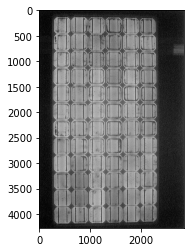

1/1 [==============================] - 0s 360ms/step


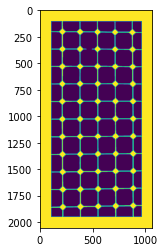

(4108, 2124)
(4107, 2121)
2


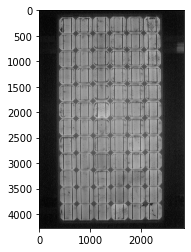

1/1 [==============================] - 0s 360ms/step


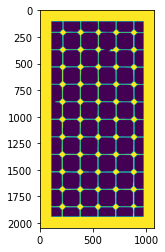

(4092, 2156)
(4089, 2154)
3


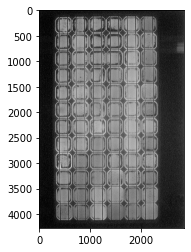

1/1 [==============================] - 0s 361ms/step


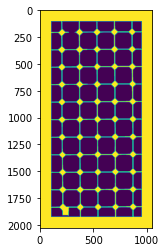

(4060, 2108)
(4057, 2105)
4


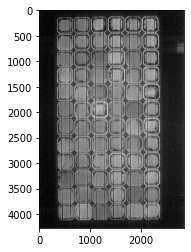

1/1 [==============================] - 0s 357ms/step


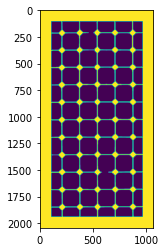

(4088, 2140)
(4088, 2140)
5


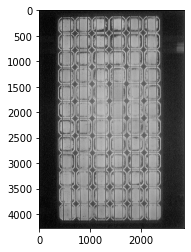

1/1 [==============================] - 0s 367ms/step


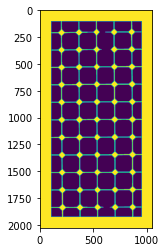

(4060, 2108)
(4057, 2105)
6


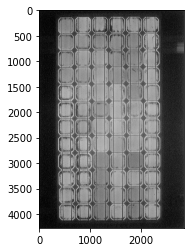

1/1 [==============================] - 0s 356ms/step


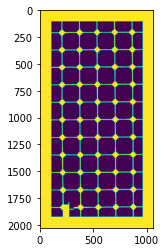

(4060, 2124)
(4057, 2122)
7


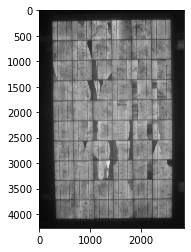

1/1 [==============================] - 0s 354ms/step


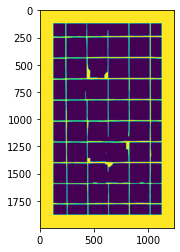

(4000, 2464)
(3998, 2463)
8


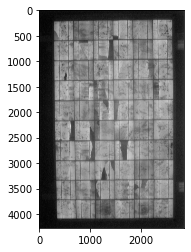

1/1 [==============================] - 0s 353ms/step


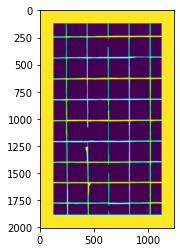

(4008, 2472)
(4008, 2469)
9


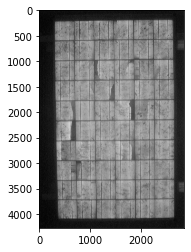

1/1 [==============================] - 0s 364ms/step


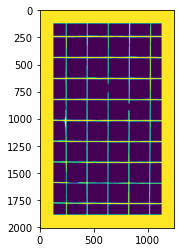

(4016, 2488)
(4015, 2485)
10


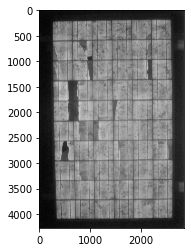

1/1 [==============================] - 0s 356ms/step


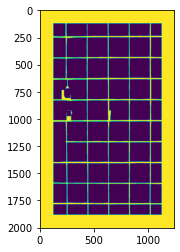

(4008, 2472)
(4005, 2471)
11


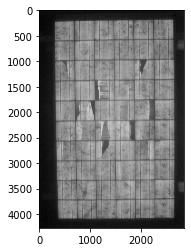

1/1 [==============================] - 0s 350ms/step


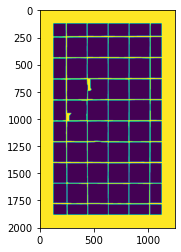

(4008, 2488)
(4005, 2486)
12


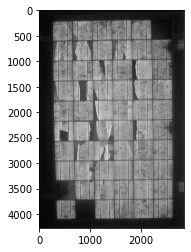

1/1 [==============================] - 0s 351ms/step


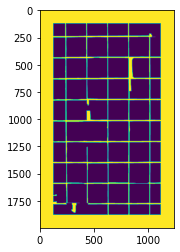

(3996, 2464)
(3996, 2462)
13


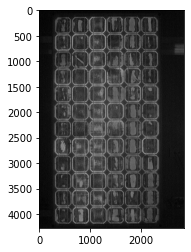

1/1 [==============================] - 0s 354ms/step


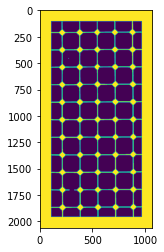

(4124, 2140)
(4124, 2138)
14


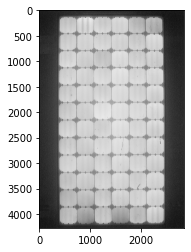

1/1 [==============================] - 0s 362ms/step


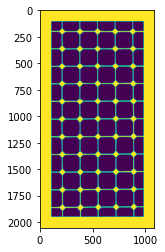

(4108, 2156)
(4107, 2155)
15


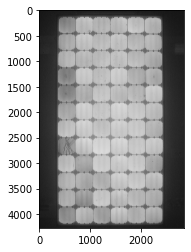

1/1 [==============================] - 0s 377ms/step


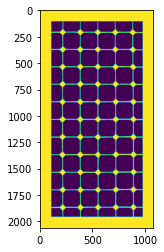

(4124, 2156)
(4124, 2155)
16


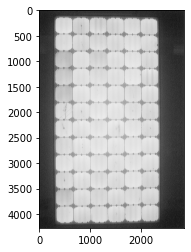

1/1 [==============================] - 0s 389ms/step


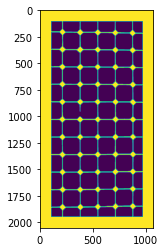

(4108, 2152)
(4105, 2149)
17


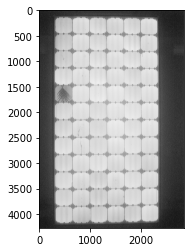

1/1 [==============================] - 0s 445ms/step


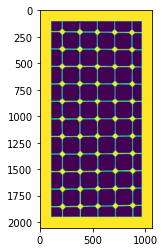

(4108, 2124)
(4107, 2122)
18


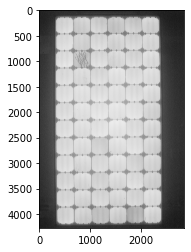

1/1 [==============================] - 0s 384ms/step


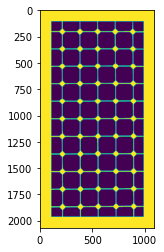

(4136, 2180)
(4136, 2178)
19


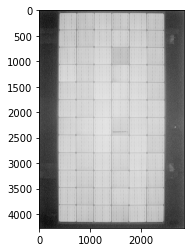

1/1 [==============================] - 0s 433ms/step


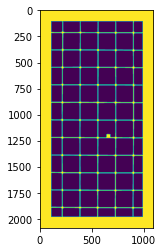

(4176, 2172)
(4173, 2172)
20


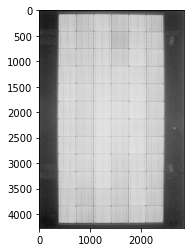

1/1 [==============================] - 0s 393ms/step


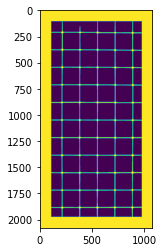

(4160, 2156)
(4157, 2155)
21


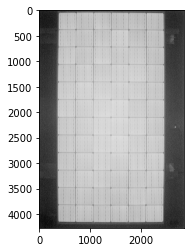

1/1 [==============================] - 0s 376ms/step


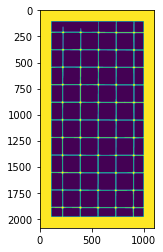

(4176, 2192)
(4173, 2189)
22


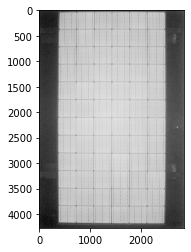

1/1 [==============================] - 0s 378ms/step


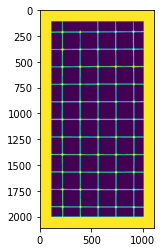

(4220, 2220)
(4219, 2218)
23


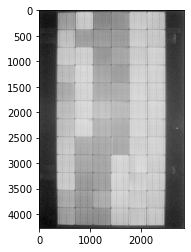

1/1 [==============================] - 0s 374ms/step


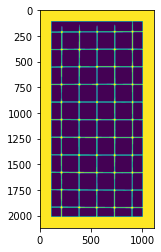

(4240, 2224)
(4240, 2222)
24


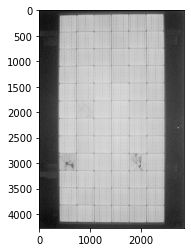

1/1 [==============================] - 0s 375ms/step


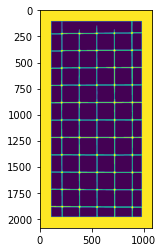

(4176, 2156)
(4174, 2154)
25


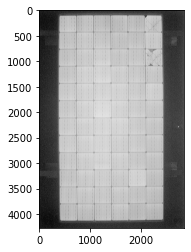

1/1 [==============================] - 0s 399ms/step


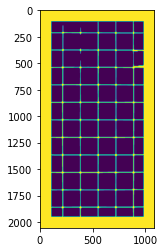

(4112, 2172)
(4109, 2169)
26


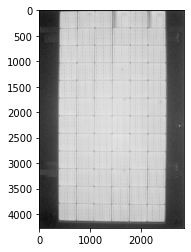

1/1 [==============================] - 0s 424ms/step


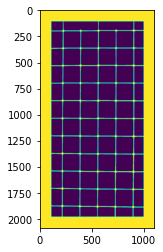

(4176, 2208)
(4173, 2205)
27


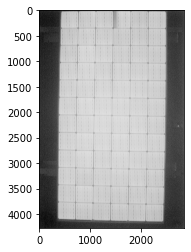

1/1 [==============================] - 0s 381ms/step


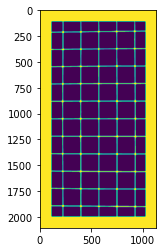

(4216, 2256)
(4213, 2255)
28


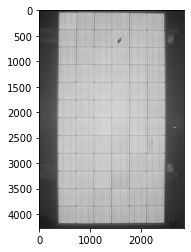

1/1 [==============================] - 0s 380ms/step


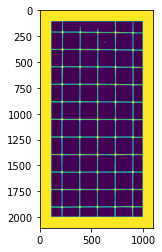

(4208, 2188)
(4207, 2188)
29


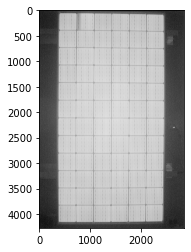

1/1 [==============================] - 0s 367ms/step


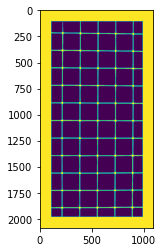

(4176, 2172)
(4173, 2172)


In [9]:
model_path_cells = "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_backbone_512.hdf5"
model_path_module = "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_PV_module_256.hdf5"
folders = ["C:/Users/chuck/OneDrive/Desktop/Honors/pv_modules_of_interest"]
toml_path = "C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel/configs/camera_config.toml"
folder_name = "cell_images"

file_names = []
for folder_path in folders:
    for file_name in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file_name)):
            file_names.append(os.path.join(folder_path, file_name))

folder_path = os.path.join(os.getcwd(), folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for i, image_path in enumerate(file_names):
    print(i)
    img = cv2.imread(image_path)
    plt.imshow(img)
    plt.show()
    panel_images = split_module_to_cells(model_path_module, model_path_cells, img, toml_path, show=False)
    for image in panel_images:
        image = cv2.resize(image, (300,300))
        file_path = f"{folder_name}/{generate_random_string(8)}.jpg"
        cv2.imwrite(file_path, image)